In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon

# Coordenadas dos polígonos para cada região
region_coords = {
    "Região 5 - Bocaiuva": [(-48.7193641, -22.5096692), (-48.7348136, -22.5157746), (-48.7372168, -22.52957), (-48.7223681, -22.5342475), (-48.7193641, -22.5096692)],
    "Região 4 - Santa Rita": [(-48.721188, -22.5289754), (-48.7175831, -22.529451), (-48.7083134, -22.5177963), (-48.7063822, -22.5133959), (-48.7124548, -22.5106802),
                              (-48.7151477, -22.5094859), (-48.7154803, -22.5099964), (-48.7165746, -22.5094314), (-48.7187633, -22.5097485), (-48.7199005, -22.5174792), (-48.721188, -22.5289754)],
    "Região 1 - Panorama": [(-48.7025934, -22.4954789), (-48.7071424, -22.4952807), (-48.7151477, -22.5094859), (-48.7063822, -22.5133959), (-48.7025934, -22.4954789)],
    "Região 2 - Centro": [(-48.7073999, -22.4953996), (-48.7163263, -22.4930206), (-48.7187633, -22.5097485), (-48.7165746, -22.5094314), (-48.7154803, -22.5099964), (-48.7073999, -22.4953996)]
}

# Criar polígonos para cada região
polygons = {name: Polygon(coords) for name, coords in region_coords.items()}

# Carregar dados dos domicílios
# Substitua 'your_data_file.csv' pelo caminho para o seu arquivo de dados
data = gpd.read_file('analise_dados/dados/3528007.csv')

print(data.columns)
# Criar um GeoDataFrame para os domicílios
homes_gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.LONGITUDE, data.LATITUDE))

# Dicionário para contar os domicílios em cada região
region_counts = {name: 0 for name in region_coords.keys()}

# Verificar em qual região cada domicílio está localizado
for index, home in homes_gdf.iterrows():
    point = home['geometry']
    for region_name, polygon in polygons.items():
        if polygon.contains(point):
            region_counts[region_name] += 1

# Exibir os resultados
for region, count in region_counts.items():
    print(f"{region}: {count} domicílios")


Index(['COD_UF', 'COD_MUN', 'COD_ESPECIE', 'LATITUDE', 'LONGITUDE',
       'NV_GEO_COORD', 'geometry'],
      dtype='object')
Região 5 - Bocayuva: 3040 domicílios
Região 4 - Santa Rita: 1624 domicílios
Região 1 - Panorama: 1383 domicílios
Região 2 - Centro: 1277 domicílios


<Axes: >

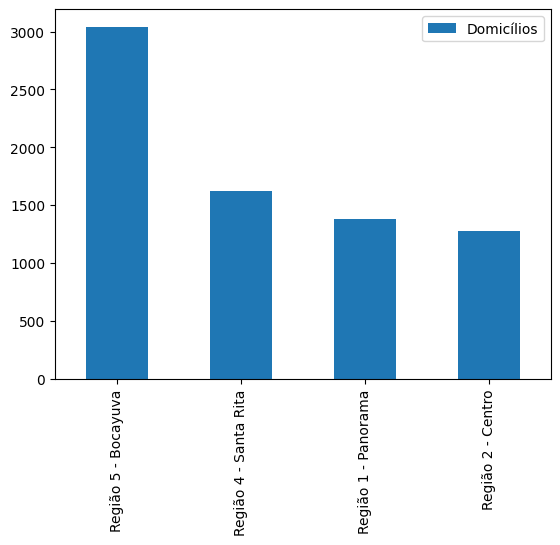

In [4]:
# criar um df com as regiões
# Gerar um datagrame com os resultados
df = pd.DataFrame.from_dict(
    region_counts, orient='index', columns=['Domicílios'])

# Plotar o resultado
df.plot(kind='bar')

In [5]:
# Corrigindo cálculo após exceção interna

# Dados do número de domicílios por região
region_counts_data = {
    'Região 5 - Bocayuva': 3040,
    'Região 4 - Santa Rita': 1624,
    'Região 1 - Panorama': 1383,
    'Região 2 - Centro': 1277
}

# Encontrar a região com o maior número de domicílios
max_region_count = max(region_counts_data.values())

# Calcular a média dos domicílios nas outras regiões
total_other_region_count = sum(region_counts_data.values()) - max_region_count
average_other_regions = total_other_region_count / (len(region_counts_data) - 1)

# Calcular a porcentagem entre a região com mais domicílios e a média das outras regiões
percentage_difference = (max_region_count - average_other_regions) / average_other_regions * 100

max_region_count, average_other_regions, percentage_difference


(3040, 1428.0, 112.88515406162465)